# 기술 통계

## 대표값

In [1]:
#데이터 요약
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
items = pd.read_csv('./data/tdata.csv', encoding='ms949')
print(items) #데이터 출력
print('=========================')
print(items['성적'].describe()) #데이터 요약
print('=========================')
print('빈도 수:', items['성적'].value_counts()) #빈도 수

   번호  성적
0   1  77
1   2  85
2   3  63
3   4  69
4   5  82
5   6  78
6   7  73
7   8  87
8   9  65
9  10  92
count    10.000000
mean     77.100000
std       9.631545
min      63.000000
25%      70.000000
50%      77.500000
75%      84.250000
max      92.000000
Name: 성적, dtype: float64
빈도 수: 65    1
82    1
85    1
87    1
73    1
69    1
92    1
77    1
78    1
63    1
Name: 성적, dtype: int64


In [2]:
#기하평균 과 조화평균
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import math
s = Series([10, 11, 10.78])
print("평균 성장률?:", s.pct_change().mean())
print("평균 성장률(기하평균):", math.sqrt((11/10)*(10.78/11)))

print("평균 속도?:" , (100+60) / 2)
print("평균 속도(조화평균):" , 2*100*60 / (100+60))

평균 성장률?: 0.040000000000000036
평균 성장률(기하평균): 1.0382677881933928
평균 속도?: 80.0
평균 속도(조화평균): 75.0


In [3]:
from scipy import stats
print('평균:', items['성적'].mean())
print('중간값:', items['성적'].median())
#상위와 하위 10% 잘라내고 평균 구하기
print('절사평균:', stats.trim_mean(items['성적'], 0.1))

평균: 77.1
중간값: 77.5
절사평균: 77.0


In [4]:
from scipy import stats
state = pd.read_csv("./data/state.csv")
print(state['Population'].mean())
print(stats.trim_mean(state['Population'], 0.1))
print(state['Population'].median())

6162876.3
4783697.125
4436369.5


In [7]:
import wquantiles

#가중 평균을 구하기 위해서는 numpy 의 average 함수를 이용
print(state['Murder.Rate'].mean())
print(np.average(state['Murder.Rate'], weights=state['Population']))
#가중 중앙값은 wquantiles 패키지의 median을 이용 - 설치 해야 함
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.066
4.445833981123393
4.4


In [7]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

#데이터 읽어오기
df = pd.read_csv("./data/descriptive.csv", encoding='ms949')
print('------데이터 읽기 ------')
print(df.head())
print('------데이터 특성 확인 ------')
print(df.shape)
print('------데이터 특성 확인 ------')
print(df.describe())

------데이터 읽기 ------
  resident  gender  age     level cost type  survey pass
0        1       1   50         1  5.1    1     1.0    2
1        2       1   54         2  4.2    1     2.0    2
2                1   62         2  4.7    1     1.0    1
3        4       2   50            3.5    1     4.0    1
4        5       1   51         1    5    1     3.0    1
------데이터 특성 확인 ------
(300, 8)
------데이터 특성 확인 ------
           gender         age      survey
count  300.000000  300.000000  187.000000
mean     1.420000   53.880000    2.609626
std      0.545826    6.813247    0.974135
min      0.000000   40.000000    1.000000
25%      1.000000   48.000000    2.000000
50%      1.000000   53.000000    3.000000
75%      2.000000   60.000000    3.000000
max      5.000000   69.000000    5.000000


In [ ]:
## 명목 척도

In [8]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#데이터 읽어오기
df = pd.read_csv("data/descriptive.csv", encoding='ms949')

print('--의미없는 요약 통계량--')
print(df['gender'].describe())

print('--구성 비율--')
print(df['gender'].value_counts())

--의미없는 요약 통계량--
count    300.000000
mean       1.420000
std        0.545826
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: gender, dtype: float64
--구성 비율--
1    173
2    124
0      2
5      1
Name: gender, dtype: int64


1    173
2    124
Name: gender, dtype: int64


<AxesSubplot:>

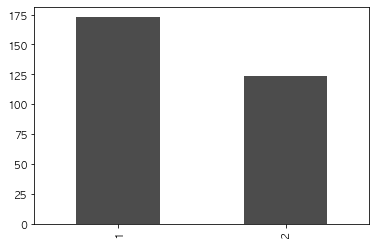

In [9]:
#데이터 정제
df = df[(df['gender'] == 1) | (df['gender'] ==2)]
print(df['gender'].value_counts())
#범주형 데이터 시각화
df['gender'].value_counts().plot.bar(color='k', alpha=0.7)

## 서열 척도

1           115
2            99
3            70
             13
Name: level, dtype: int64


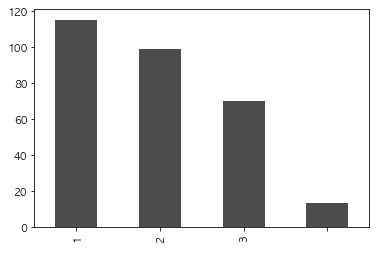

In [10]:
plt.figure()
#데이터 읽어오기
df = pd.read_csv("data/descriptive.csv", encoding='ms949')

#데이터 정제
df = df[(df['gender'] == 1) | (df['gender'] ==2)]
print(df['level'].value_counts())

#범주형 데이터 시각화
df['level'].value_counts().plot.bar(color='k', alpha=0.7)
plt.show()

## 등간 척도

count    187.000000
mean       2.609626
std        0.974135
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: survey, dtype: float64


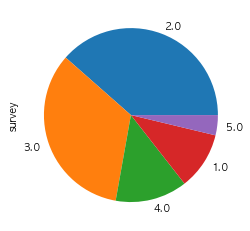

In [11]:
plt.figure()
#데이터 읽어오기
df = pd.read_csv("data/descriptive.csv", encoding='ms949')
print(df['survey'].describe())
#등간 척도 데이터 시각화
df['survey'].value_counts().plot.pie()
plt.show()

## 비율 척도

0      5.1
1      4.2
2      4.7
3      3.5
4      5.0
      ... 
295    7.1
296    6.1
297    5.5
298    5.1
299    4.4
Name: cost, Length: 300, dtype: float64


/Users/adam/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/adam/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


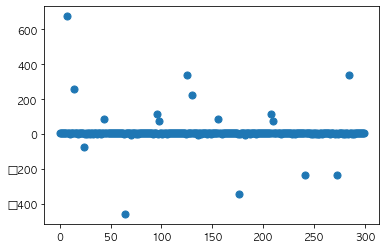

In [12]:
plt.figure()
#데이터 읽어오기
df = pd.read_csv("data/descriptive.csv", encoding='ms949')
print(df['cost'].replace('               ', '0').astype(float))
plt.scatter(df.index, df['cost'].replace('               ', '0').astype(float), s=50)
plt.show()

In [13]:
df = pd.read_csv("data/descriptive.csv", encoding='ms949')
cost = df['cost'].replace('               ', '0').astype(float)
print(cost[(cost>=2)&(cost<=10)].describe())
print(cost[(cost>=2)&(cost<=10)].value_counts())

count    251.000000
mean       5.360558
std        1.137435
min        2.100000
25%        4.600000
50%        5.400000
75%        6.200000
max        7.900000
Name: cost, dtype: float64
5.0    18
6.3    16
4.0    15
6.0    14
6.2    13
5.1    11
6.4    11
5.2     9
5.5     9
4.1     9
6.1     8
6.7     8
5.3     7
4.7     6
5.7     6
3.0     6
4.6     5
5.8     5
5.4     5
3.5     5
4.3     5
4.4     4
4.9     4
6.9     4
6.5     4
6.8     4
7.7     4
7.1     4
5.6     4
3.9     3
3.8     3
4.2     3
7.0     3
2.3     2
7.9     2
7.2     2
3.3     2
4.8     2
5.9     2
3.4     2
4.5     1
2.1     1
Name: cost, dtype: int64


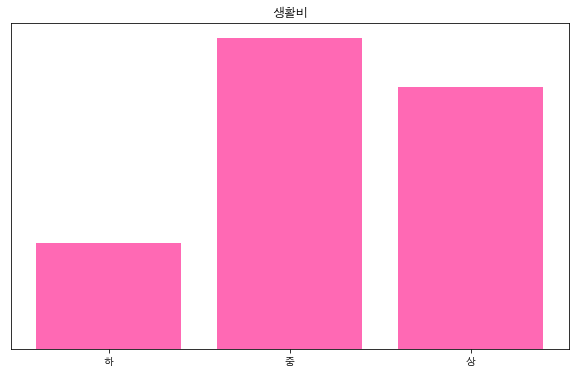

In [47]:
df = pd.read_csv("data/descriptive.csv", encoding='ms949')
cost = df['cost'].replace('               ', '0').astype(float)

plt.figure(figsize=(10, 6))

## histogram의 경우 내가 값 리스트를 넣고, 입력한 bin 개수에 따라 알아서 분류해줌 
## ys: y값, 
## xs: x 값
ys, xs, patches = plt.hist(cost[(cost>=2)&(cost<=10)], 
         bins=3, ## 몇 개의 바구니로 구분할 것인가. 
         density=True, ## ytick을 퍼센트비율로 표현해줌 
         cumulative=False, ## 누적으로 표현하고 싶을 때는 True
         histtype='bar',  ## 타입. or step으로 하면 모양이 바뀜.  
         orientation='vertical', ## or horizontal
         rwidth=0.8, ## 1.0일 경우, 꽉 채움 작아질수록 간격이 생김
         color='hotpink', ## bar 색깔
        )

plt.yticks([])## text로 표시하고 있기 때문에 이 부분은 삭제해줌 
## xticks을 변경해줌 
plt.xticks([(xs[i]+xs[i+1])/2 for i in range(0, len(xs)-1)], 
           ["하", "중", "상"])
plt.title('생활비')
plt.show()

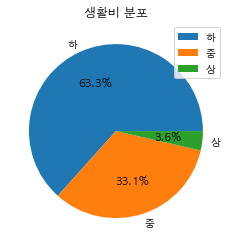

In [50]:
plt.figure()
df = pd.read_csv("data/descriptive.csv", encoding='ms949')
cost = df['cost'].replace('               ', '0').astype(float)

cost = cost[(cost>=1)&(cost<=10)]
cost[(cost>=1)&(cost<=3)] = 1
cost[(cost>3)&(cost<=6)] = 2
cost[(cost>6)] = 3

cost = cost.astype(int)

label = ["하", "중", "상"]

plt.pie(cost.value_counts(), labels=label, autopct='%1.1f%%')
plt.title('생활비 분포')
plt.legend()
plt.show()

In [9]:
print(state.head(8))
#표준 편차
print(state['Population'].std())
#IQR - 사분위 범위
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))
#중위 절대 편차(MAD)
from statsmodels import robust
print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE
6848235.347401142
4847308.0
3849876.1459979336
3849876.1459979336


## 데이터 분포 탐색

In [10]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [11]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


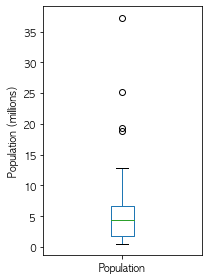

In [12]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#인구에 대한 상자 그림
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')
plt.tight_layout()
plt.show()

In [13]:
#10개의 구간으로 분할
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


In [14]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

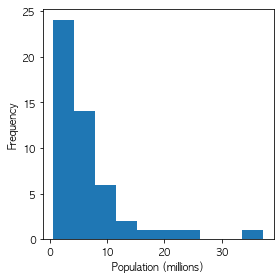

In [15]:
#히스토그램
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='살인비율', ylabel='Density'>

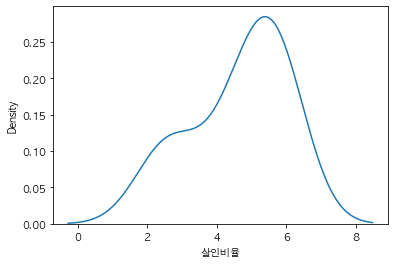

In [45]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()


# 멕시코 풍 프랜차즈 chipotle 주문 데이터의 탐색적 분석

## [Chipotle 데이터셋의 기본 정보]

In [20]:
import pandas as pd

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
file_path = './data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')
print(chipo.shape)
print("------------------------------------")
chipo.info()

(4622, 5)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Chipotle 데이터셋의 행과 열, 데이터

In [21]:
# chipo 라는 Dataframe에서 순서대로 10개의 row 데이터를 보여줍니다.
print(chipo.head(10))
print("------------------------------------")
print(chipo.columns)
print("------------------------------------")
print(chipo.index)

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

### Chipotle 데이터셋의 수치적 특징 파악

In [22]:
# order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환
chipo['order_id'] = chipo['order_id'].astype(str)

# chipo dataframe에서 수치형 피처들의 요약 통계량을 확인
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [23]:
# order_id의 개수를 출력
print(len(chipo['order_id'].unique()))
# item_name의 개수를 출력
print(len(chipo['item_name'].unique()))

1834
50


## 탐색과 시각화

### 가장 많이 주문한 아이템 TOP 10

In [24]:
# 가장 많이 주문한 item : top 10을 출력합니다.
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


### 아이템별 주문 개수와 총량

In [25]:
# item당 주문 개수를 출력합니다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] # item당 주문 개수를 출력합니다.

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [26]:
# item당 주문 총량을 출력합니다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # item당 주문 총량을 출력합니다.

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

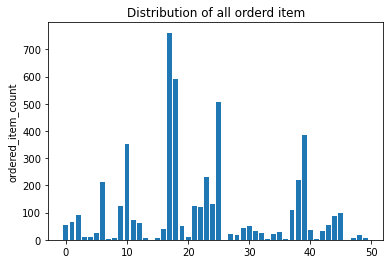

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()
 
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')
 
plt.show()

## 데이터 전처리

In [28]:
print(chipo.info())
print('-------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [29]:
# column 단위 데이터에 apply 함수로 전처리를 적용합니다.
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [30]:
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

## 개념적 탐색 분석

### 주문당 평균 금액 출력

In [31]:
# 주문당 평균 계산금액을 출력합니다.
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [32]:
chipo.groupby('order_id')['item_price'].sum().describe()[:10]

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

### 한 주문에 10달러 이상 지불한 주문 번호(id) 출력

In [33]:
# 한 주문에 10달러 이상 사용한 id를 출력합니다.
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


### 각 아이템의 가격 구하기

In [34]:
# 각 아이템의 가격을 계산합니다.
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


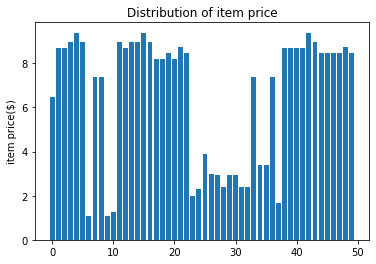

In [35]:
# 아이템 가격 분포 그래프를 출력합니다.
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()
 
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
 
plt.show()

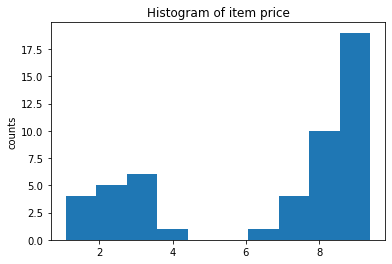

In [36]:
# 아이템 가격 히스토그램을 출력합니다.
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()

### 가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기

In [37]:
# 가장 비싼 주문에서 item이 총 몇개 팔렸는지를 계산합니다.
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


### Veggie Salad Bowl이 몇 번 주문되었는지 구하기

In [38]:
# “Veggie Salad Bowl”이 몇 번 주문되었는지를 계산합니다.
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id']) # 한 주문 내에서 중복 집계된 item_name을 제거합니다.

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### “Chicken Bowl”을 2개 이상 주문한 주문 횟수를 구하기

In [39]:
# “Chicken Bowl”을 2개 이상 주문한 주문 횟수를 구합니다.
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]
print(chipo_chicken_result.shape[0])

33


### “Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량을 구하기

In [40]:
# “Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량을 구합니다.
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64